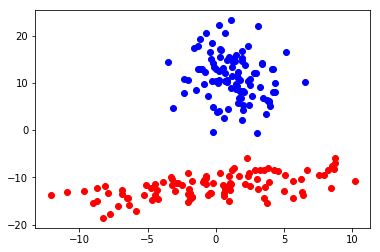

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('archivos_practico2_2017/dataset1Pr2.csv', 'r') as f:
        data = [row for row in csv.reader(f.read().splitlines(),delimiter=',',quoting=csv.QUOTE_NONNUMERIC)]
X = []
Y = []
for lis in data:
    if lis[2] == 0:
        X.append([lis[0],lis[1],-1])
    else:
        X.append(lis) 
for x in X:
    r = x[2]
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or')       
plt.show()        

In [13]:
from numpy.random import rand

class Perceptron:
    def __init__(self):
        """ perceptron initialization """
        self.w = rand(2)*2-1 # weights
        self.bias = rand(1)*2-1
        self.learningRate = 0.1

    def response(self,x):
        """ perceptron output """
        y = x[0]*self.w[0]+x[1]*self.w[1] + self.bias # dot product between w and x
        if y >= 0:
            return 1
        else:
            return -1

    def updateWeights(self,x,iterError):
        """
        updates the weights status, w at time t+1 is
            w(t+1) = w(t) + learningRate*(d-r)*x
        where d is desired output and r the perceptron response
        iterError is (d-r)
        """
        self.w[0] += self.learningRate*iterError*x[0]
        self.w[1] += self.learningRate*iterError*x[1]
        self.bias += self.learningRate*iterError*x[2]

    def train(self,data):
        """ 
        trains all the vector in data.
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        iteration = 0
        while not learned:
            globalError = 0.0
            for x in data: # for each sample
                r = self.response(x)    
                if x[2] != r: # if we have a wrong response
                    iterError = x[2] - r # desired response - actual response
                    self.updateWeights(x,iterError)
                    globalError += abs(iterError)
            iteration += 1
            if globalError == 0.0 or iteration >= 1500: # stop criteria
                print 'iterations',iteration
                learned = True # stop learning

iterations 5
[ 0.33613184  2.15584698]
[ 1.15357911]


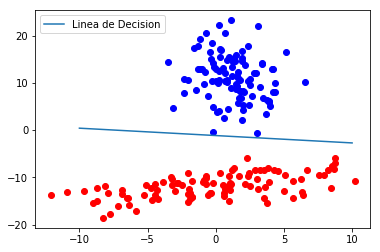

In [21]:

perceptron = Perceptron()   # perceptron instance
perceptron.train(X)  # training

# Perceptron test
for x in X:
    r = perceptron.response(x)
    if r != x[2]: # if the response is not correct
          print 'error'
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or')


print perceptron.w
print perceptron.bias


x = np.linspace(-10,10)
y = -(perceptron.w[0]/perceptron.w[1])*x-perceptron.bias

fig1 = plt.plot(x, y, label = 'Linea de Decision')
plt.legend(loc='upper left') 
plt.savefig('foo.jpg')
plt.show()

